Equipo conformado por:

1.   Denisse Dominguez Bolaños A01702603
2.   Miguel Weiping Tang Feng A01610836
1.   Adrian Matute Beltran A01703889


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (16, 9)

In [49]:
df = pd.read_excel('data.xlsx', usecols = ['Episode ', 'Watch Time (minutes)', 'IMDB'])
dfrows = pd.read_excel('data.xlsx', usecols = ['Episode '])
nueva = np.array(df)
X = scale(nueva)
y = pd.DataFrame(dfrows)
#variable_names = df.feature_names
X[0:10,]

array([[-1.41935532,  0.36360723, -0.23118224],
       [-0.98263061,  0.36360723, -1.36607689],
       [-0.54590589,  0.01913722,  0.33626508],
       [-0.10918118,  0.19137223,  0.52541419],
       [ 0.32754354,  0.36360723, -1.17692778],
       [ 0.76426825,  0.19137223, -0.98777868],
       [ 1.20099297,  0.36360723, -0.23118224],
       [ 1.63771768,  0.01913722, -0.98777868],
       [ 2.0744424 ,  0.88031224, -1.17692778],
       [-1.41935532,  0.70807724,  1.09286151]])

In [50]:
clustering = KMeans(n_clusters=9, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [51]:
nueva_df = pd.DataFrame(nueva)
nueva_df.columns=['Episode ', 'Watch Time (minutes)', 'IMDB']
y.columns=['Episode ']

Text(0.5, 1.0, 'Clasificación K-Means')

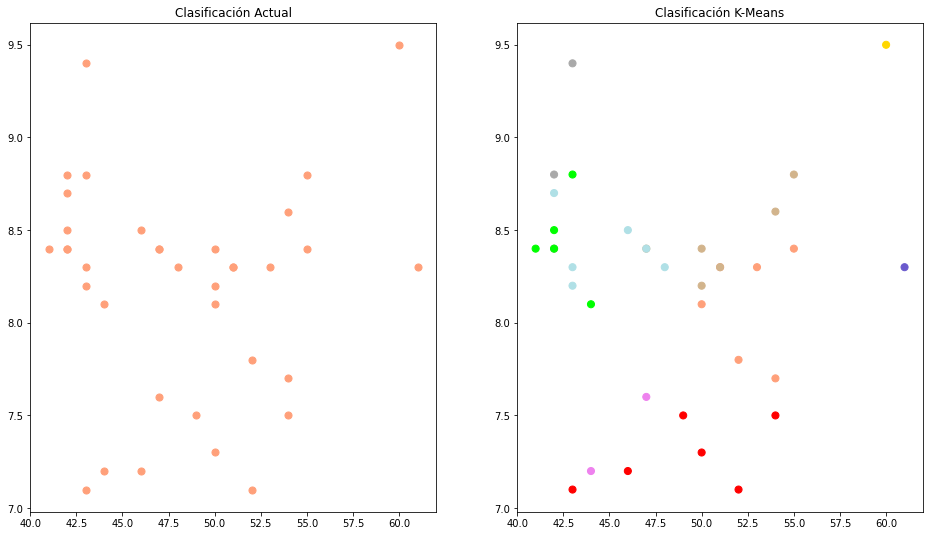

In [52]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue', 'tan', 'gold', 'red', 'lime', 'violet', 'slateblue'])
plt.subplot (1,2,1)
plt.scatter(x=nueva_df['IMDB'], y=nueva_df['Watch Time (minutes)'], c=color_theme[1], s=50)
plt.title ("Clasificación Actual") 

plt.subplot (1,2,2)
plt.scatter(x=nueva_df['IMDB'], y=nueva_df['Watch Time (minutes)'], c=color_theme[clustering.labels_], s=50)
plt.title ("Clasificación K-Means")

Hemos decidio elimiar la variable de Season ya que como hemos mencionado anteriormente, esta realmente no nos brinda mucha información como el resto de las variable, esta solo nos brindaba la cantidad de temporadas, donde realmente en este caso nos intersa conocer el rendimiento e interés de los capitulos

In [74]:
# Para determinar K y ver los centros del algoritmo k-means
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
X = np.array(df[['Episode ', 'Watch Time (minutes)', 'IMDB']])
y = np.array(df['Episode '])
X.shape

(36, 3)

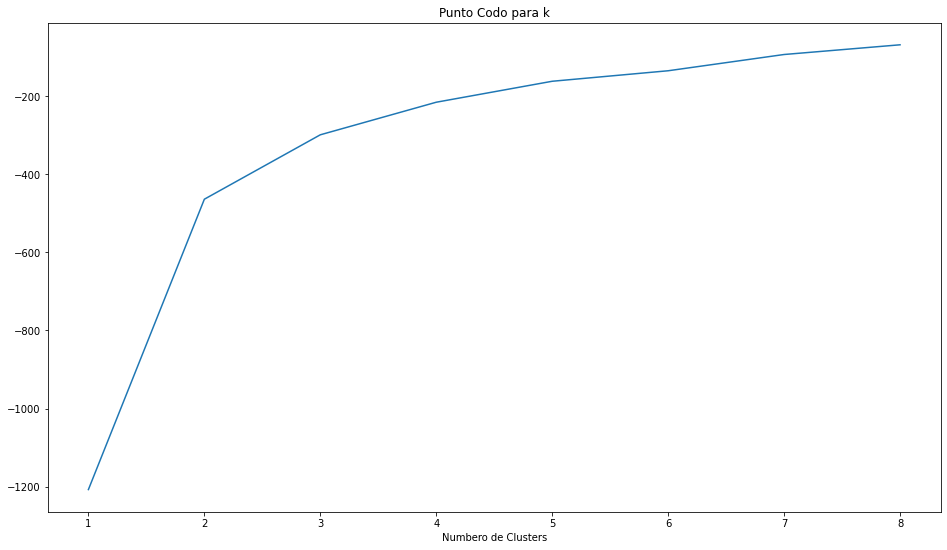

In [84]:
# Para determinar K debemos ver nuestro punto codo, que es el rango de valores
# para la distancia entre los puntos de datos y su centro
# Nc = 9 considerando 9 clusters
Nc = range(1, 9)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numbero de Clusters')
plt.title('Punto Codo para k')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=3).fit(X) # k = 3
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.68421053 43.94736842  8.24736842]
 [ 8.         60.5         8.9       ]
 [ 3.2        52.          8.02      ]]


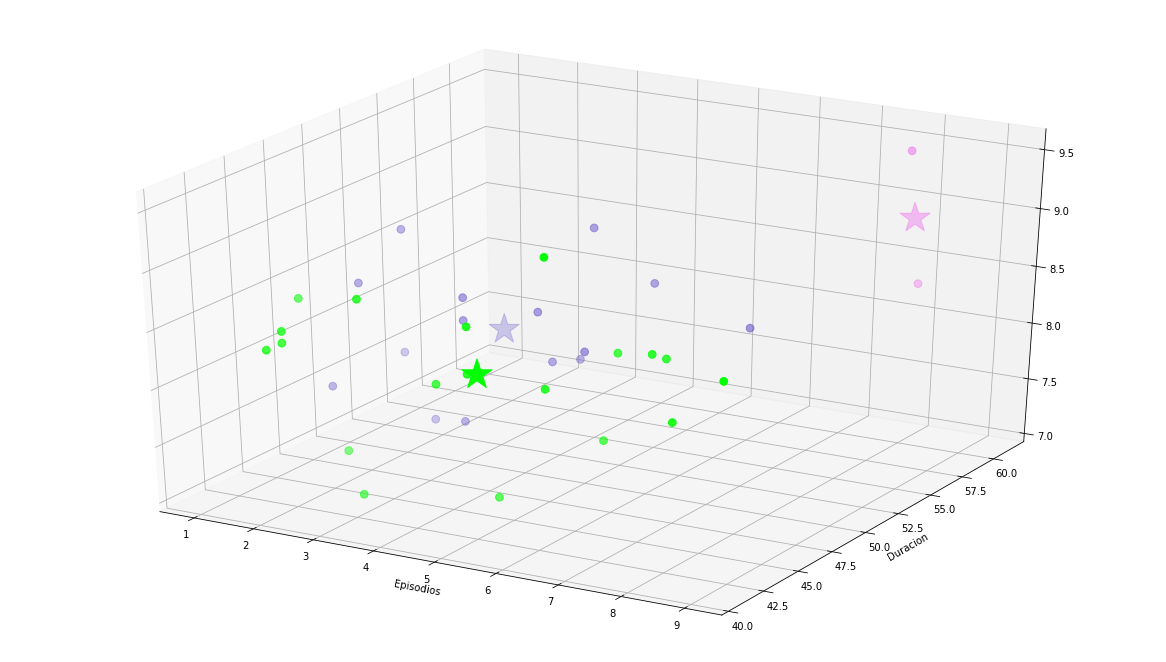

In [91]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=[ 'lime', 'violet', 'slateblue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('Episodios')
plt.ylabel('Duracion')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Referencias del código para centros. Na8. (12 marzo 2018) K-Means en Python paso a paso. Consultado en https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
Si consideramos que son representativos ya que despues de ellos podemos hacer agrupaciones de acuerdo a los aspectos y datos relacionados cerca de cada centro


¿Cómo obtuviste el valor de k a usar?
Por medio de una grafica de codo, donde de acuerdo a los clusters seleccionados podemos obtener el punto codo, el cual supuestamente es el adecuado para el punto K. Numero de agrupaciones


¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
Dado que no tenemos muchas variables, en nuestro caso sería mas bajo el tener que agrupar poca informacion en varios clusters, dispersando y separando bastante la informacion


¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?

Tenemos dos centros cerca y uno lejos de dichos dos

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
Deberiamos tener mas centros para cubrir esos datos dado que se encuentran muy separados de los datos principales o bien alejar los centros actuales para poder acercarnos a la informacion del outliers disminuyendo la precisión de los resutados dado el movimiento


¿Qué puedes decir de los datos basándose en los centros? Que de acuerdo a los datos, podemos realizar agrupaciones dada la posicion de los puntos, es decir, poder clasificar a mayor escala la informacion de acuerdo a las relaciones que se obtengan entre resultados de datos